# Desafio Cientista de Dados - BR Distribuidora

## Objetivos do Desafio:
        1.0 - Realizar análise exploratória dos dados.
        2.0 - Construir um modelo de previsão de vendas com base nos dados históricos (Problema de regressão).

## Proposta de Solução:
        1.0 - Tabelas|Visualizações|Números
        2.0 - Tabelas|Visualizações

In [1]:
# Import libraries necessary for this project
from time import time

import pandas as pd
import numpy as np

#Import visualization libratires
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Image settings for visualization
from IPython.core.pylabtools import figsize

figsize(12, 9)

sns.set()

In [3]:
def create_status(df):
    """create a status dataset giving the column name, type, sum of NaNs and percentage of NaNs 
    Args:
    
    df: dataset
    
    Return:
    
    status: dataset (columns: column names of df,
                    type: type of the data in each column of df,
                    Sum of NaN: sum of NaN values for each column in df,
                    NaN%: percentage of NaN values for each column in df)
    """
    
    status= pd.DataFrame({'columns': df.columns,
                          'type': df.dtypes,
                          'Sum of NaN': df.isnull().sum(),
                          'NaN%': df.isnull().sum()/len(df)})
    return status

In [4]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

In [5]:
df = pd.read_csv("BlackFriday.csv")

# 1.0 - Análise Exploratória de Dados

In [6]:
df.shape

(537577, 12)

Podemos ver que é um dataset relativamente grande com 537k de intens.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Percebemos que as _features_ do _dataset_ constituem três tipos de dados __int64__, __float64__ e __object__. Em um problema de regressão linear, é uma boa prática estudar as _features_ de tipo __object__ para saber como melhor transformá-las.

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [10]:
status = create_status(df)
status = status.reindex(columns=['type','Sum of NaN','NaN%']).sort_values(by = 'Sum of NaN', ascending=False)
status

,type,Sum of NaN,NaN%
Product_Category_3,float64,373299,0.694410
Product_Category_2,float64,166986,0.310627
User_ID,int64,0,0.000000
Product_ID,object,0,0.000000
Gender,object,0,0.000000
Age,object,0,0.000000
Occupation,int64,0,0.000000
City_Category,object,0,0.000000
Stay_In_Current_City_Years,object,0,0.000000
Marital_Status,int64,0,0.000000


Olhando agora para a porcentagem de valores NaN, vemos que a _feature_ `Product_Category_3` possui uma cerca de __70%__ de seus valores como NaN o que inviabiliza uma análise desses dados. A `Product_Category_2` também possui uma porcentagem um pouco acima do que eu gosto de trabalhar, porém dado ao número reduzido de _features_, eu optarei por tratar esses valores. 

### 1.1 - User_ID

In [11]:
df.User_ID.nunique()

5891

vemos que os 537k itens foram comprados por 5891 consumidores 

In [12]:
df['User_ID'].value_counts()

1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
           ... 
1005810       6
1005391       6
1005608       6
1002111       6
1000708       5
Name: User_ID, Length: 5891, dtype: int64

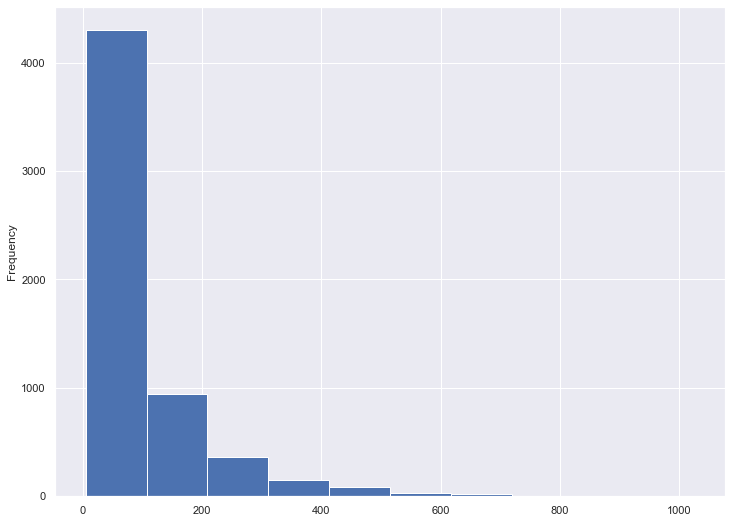

In [13]:
df['User_ID'].value_counts().plot(kind='hist');

É possível ver que poucos usuários concentraram grande parte das vendas contidas nos dados.

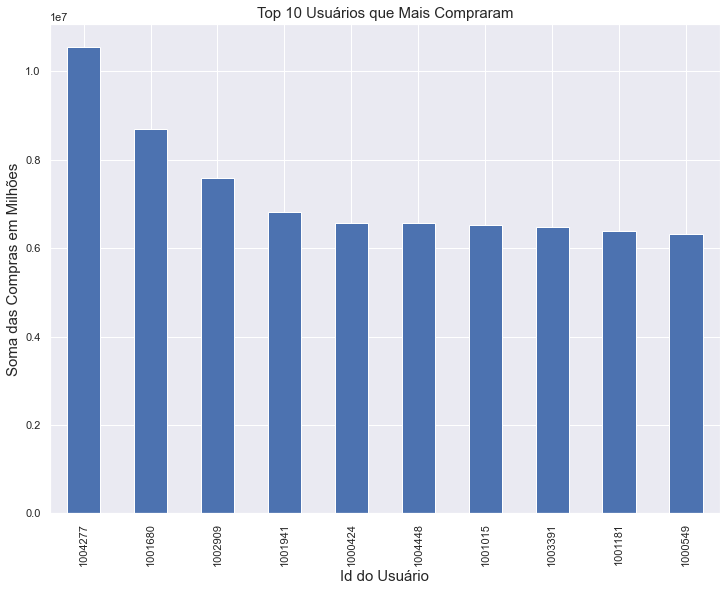

In [14]:
df.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Usuários que Mais Compraram',  {'fontsize':15})
plt.xlabel('Id do Usuário', {'fontsize':15})
plt.ylabel('Soma das Compras em Milhões', {'fontsize':15});

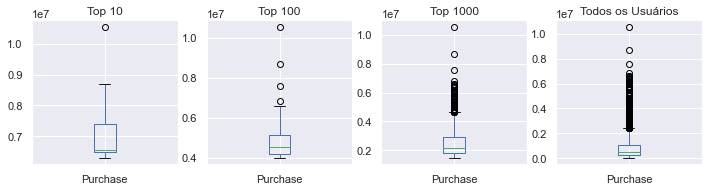

In [15]:
for i,j in enumerate([10, 100, 1000, df.shape[0]]):
    ax=plt.subplot(3,4,i+1)
    if not j==df.shape[0]:
        plt.title('Top '+ str(j))
        
    else:
        plt.title('Todos os Usuários')
    df.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False)[:j].plot(kind='box')

Analisando por box plot as compras por usuário, é possível inferir que há uma distorção muito grande em termos de _outliers_ quando vemos o top 10, top 100, top 1000 e usuários totais. Acredito que essa diferença se trate de grandes lojistas. Existindo uma grande discrepância para o usuário __100477__.

### 1.2 - Product_ID

In [16]:
print(f'Foram vendidos {df.Product_ID.nunique()} produtos diferentes')

Foram vendidos 3623 produtos diferentes


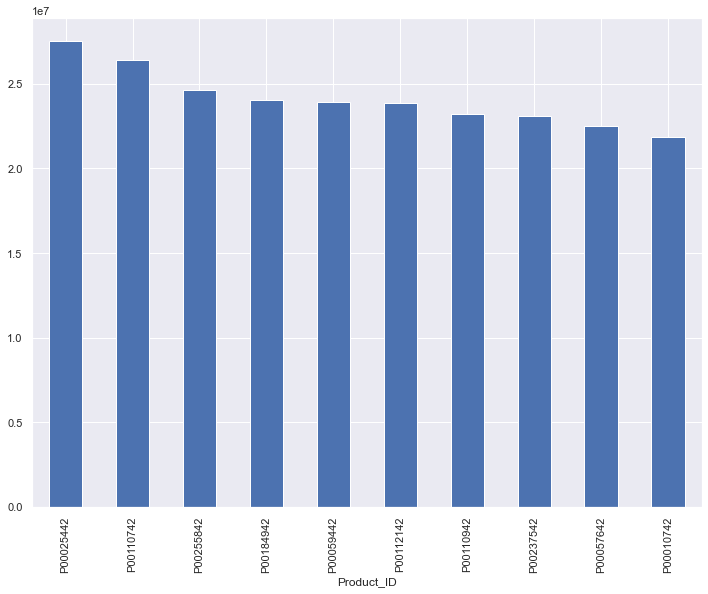

In [17]:
df.groupby(['Product_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar');

In [18]:
df.Purchase.sum()/df.User_ID.nunique()

851751.5494822611

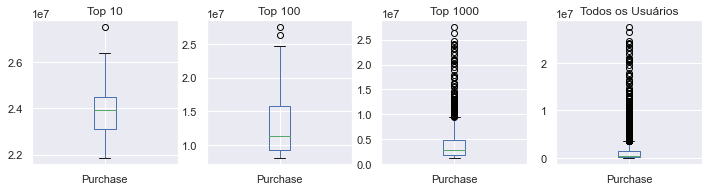

In [19]:
for i,j in enumerate([10, 100, 1000, df.shape[0]]):
    ax=plt.subplot(3,4,i+1)
    if not j==df.shape[0]:
        plt.title('Top '+ str(j))
        
    else:
        plt.title('Todos os Usuários')
    df.groupby(['Product_ID'])['Purchase'].sum().sort_values(ascending=False)[:j].plot(kind='box')

Os valores na _feature_ `Product_ID` seguem um padrão semelhante ao `User_ID` contendo uma grande quantidade de _outliers_. Essas detecções acabam por ser importante pois é preciso que sejam levadas em conta na preparação do modelo e interferem diretamente nas métricas que avaliam os modelos de regressão.

### 1.3 - Gender & Age 

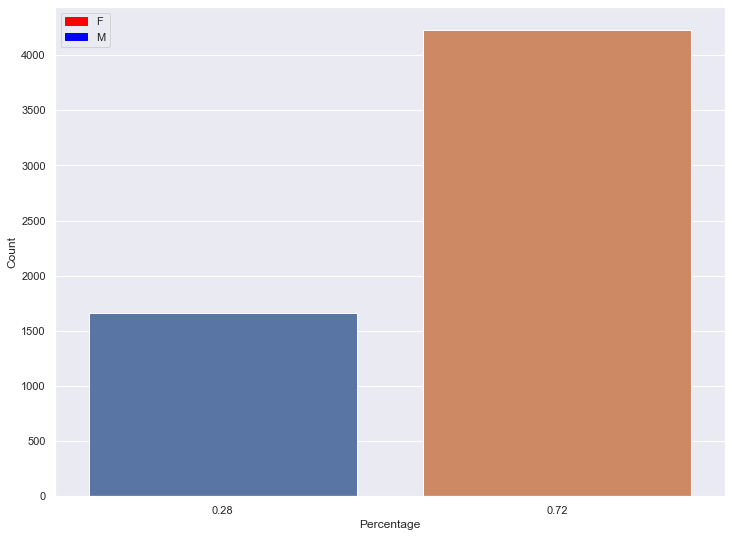

In [20]:
gender_unique = df.groupby('Gender')['User_ID'].nunique()
pct_gen = np.round(gender_unique.values/gender_unique.sum(), 2)
gender_unique = pd.DataFrame({'Gender':gender_unique.index, 'Count': gender_unique.values, 
                              'Percentage': pct_gen})

colors = {'F':'red', 'M':'Blue'}
c = df['Gender'].apply(lambda x: colors[x])
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
sns.barplot(x='Gender', y='Count',data=gender_unique)
plt.xticks(np.arange(2), labels=[str(gender_unique.Percentage[0]), str(gender_unique.Percentage[1])])
plt.xlabel('Percentage')
plt.legend(handles, labels);

As pessoas do sexo masculino apresentaram a maior parcela dos compradores com __72%__. 

In [21]:
df[df['Age']=='26-35'].Purchase.sum()/df.Purchase.sum()

0.39854150480886963

In [22]:
age_values = df.Age.value_counts()
age_pct = [round(i/df.shape[0], 2) for i in age_values.values]
age= pd.DataFrame({'Age':age_values.index, 'Count':age_values.values, 'Percentage':age_pct})

In [23]:
age

,Age,Count,Percentage
0,26-35,214690,0.40
1,36-45,107499,0.20
2,18-25,97634,0.18
3,46-50,44526,0.08
4,51-55,37618,0.07
5,55+,20903,0.04
6,0-17,14707,0.03


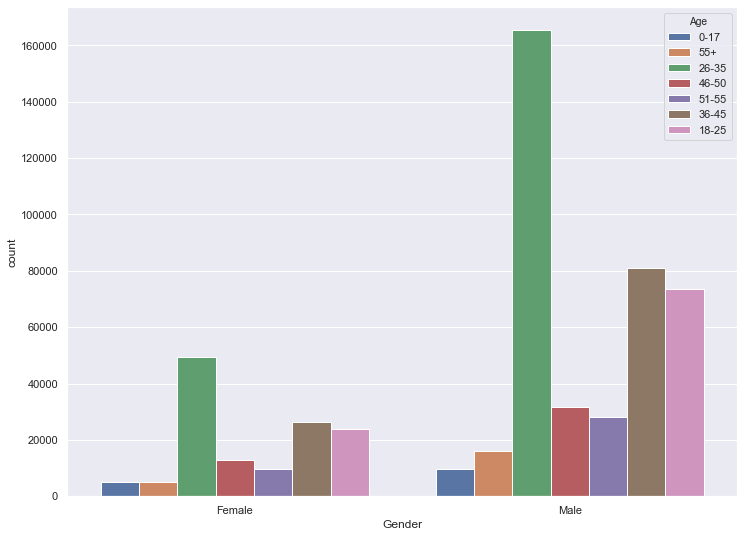

In [24]:
sns.countplot(x='Gender',hue='Age', data=df)
plt.xticks(np.arange(2), labels=['Female', 'Male']);

Segmentando os sexos por idade, vemos que é seguido um padrão para ambos os sexos onde pessoas com idade entre 26 e 35 anos representaram a maior parcela de compras com cerca __40%__ das vendas totais. Sendo este o nosso público alvo.   

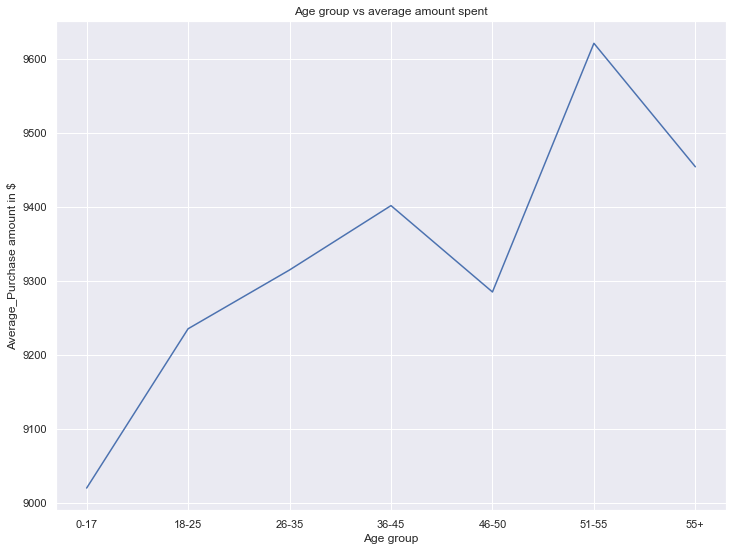

In [25]:
df.groupby('Age')['Purchase'].mean().plot()
plt.xlabel('Age group')
plt.ylabel('Average_Purchase amount in $')
plt.title('Age group vs average amount spent')
plt.show()

Interessante ver que mesmo as pessoas com idade entre 51-55 anos representem uma parcela pequena das compras, eles gastaram em média valores mais altos que as outras idades indicando que as pessoas nessa faixa tendem a comprar itens mais caros. 

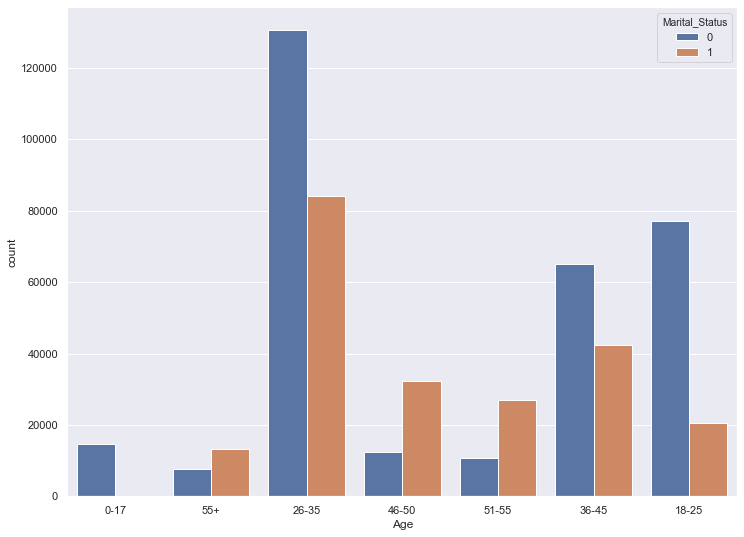

In [26]:
sns.countplot(df['Age'],hue=df["Marital_Status"]);

Esse gráfico indica que pessoas solteiras(0) compraram mais que pessoas casadas(1), porém há uma inversão no gráfico quando consideramos somente pessoas com idades acima de 46 anos.

### 1.4 - City Category 

In [27]:
city_values = df.City_Category.value_counts()
city_pct = [round(i/df.shape[0], 2) for i in city_values.values]
city= pd.DataFrame({'City':city_values.index, 'Count':city_values.values, 'Percentage':city_pct})
city

,City,Count,Percentage
0,B,226493,0.42
1,C,166446,0.31
2,A,144638,0.27


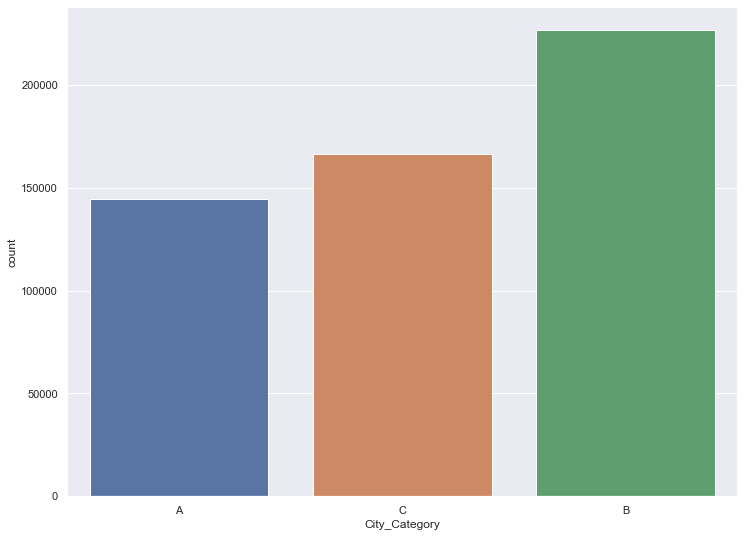

In [28]:
sns.countplot(df['City_Category']);

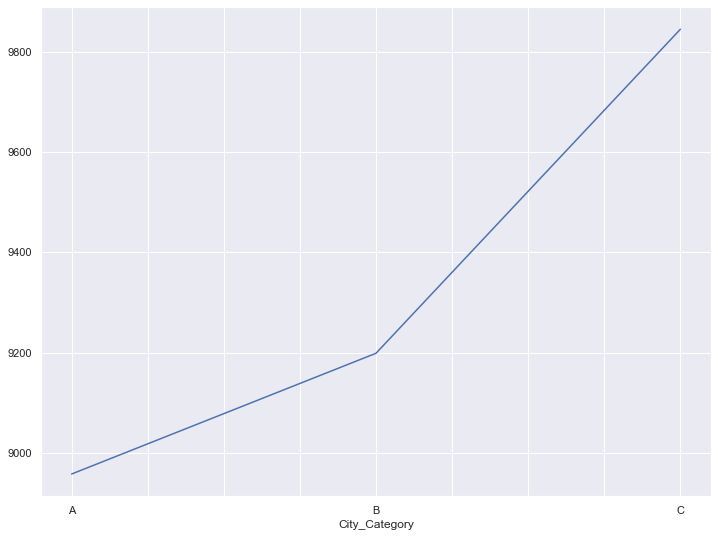

In [29]:
df.groupby('City_Category')['Purchase'].mean().plot();

De acordo com os gráficos, vemos que a média de compras e a contagem de compras por cidade seguiram na mesma proporção.  

### 1.5 - Occupation

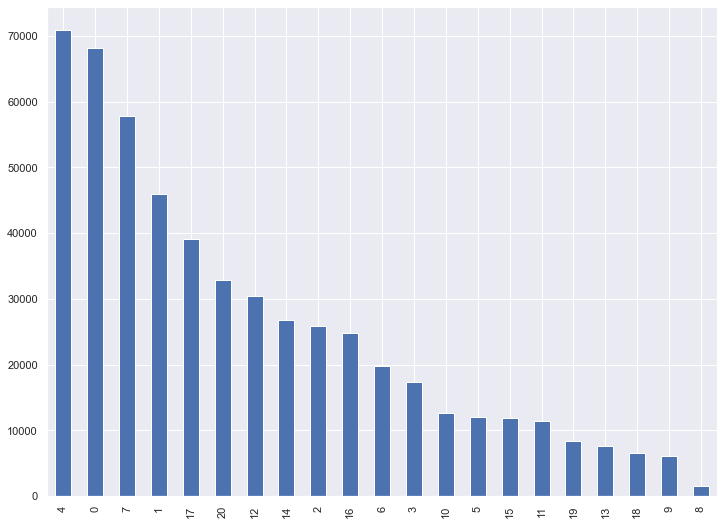

In [30]:
df['Occupation'].value_counts().plot(kind='bar');

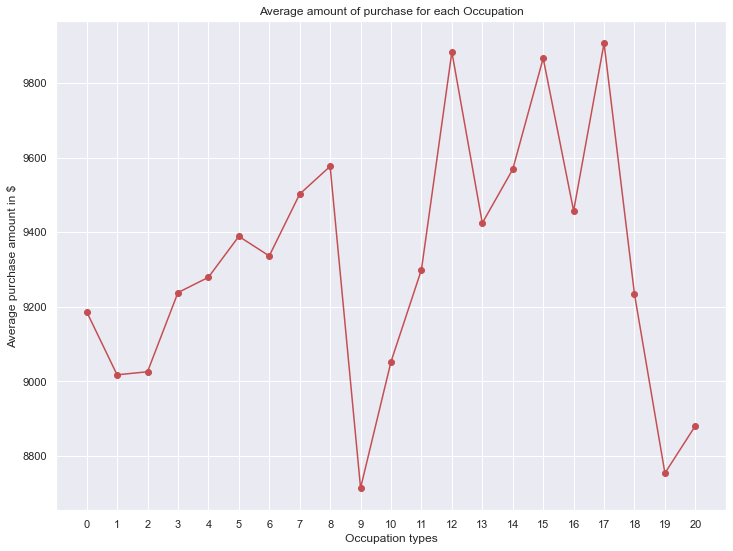

In [31]:
OS= df.groupby(['Occupation'])['Purchase'].mean()
plt.plot(OS.index,OS.values,'ro-')
plt.xticks(OS.index)
plt.xlabel('Occupation types')
plt.ylabel('Average purchase amount in $')
plt.title('Average amount of purchase for each Occupation')
plt.show()

In [32]:
values = [i for i in df.groupby(['Occupation'])['Purchase'].mean().values if i <9200]
a = sum(values)/len(values)
1- a/9200

0.0274361828678239

* O contagem de ocupação não contribuiu de forma significativa para o montante gasto.
* Seria bom ver as descrição de cada tipo de ocupação para entender a melhor forma de atacar o problema.
* A análise gráfica indica que as ocupações 9, 19 e 20 não seguem muito perfil dos produtos vendidos pela empresa. Seria isso um problema de nicho? Faria sentido buscar uma melhor estratégia para buscar uma maior fatia desse tipo de acupação. 
* Uma outra maneira de atacar as ocupações seria talvez buscar um aumento de venda mais geral buscando talvez uma meta mínima de 9200 dólares gastos para cada ocupação o que geraria um aumento de cerca de 3% no montante médio gasto.

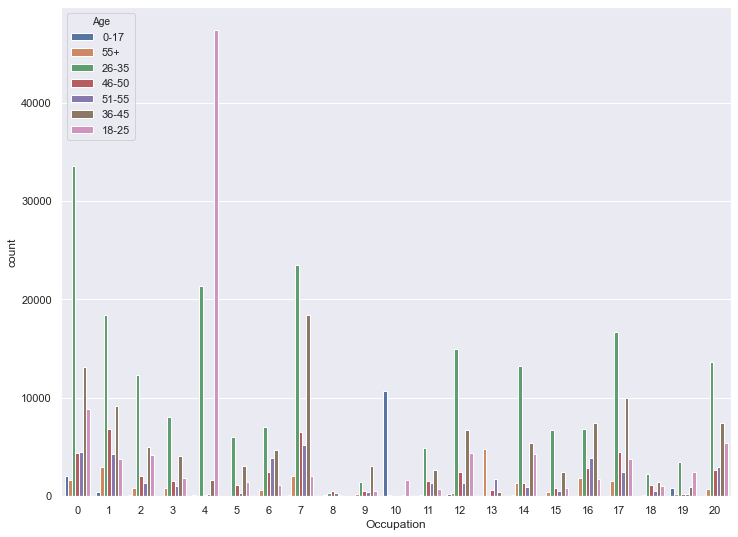

In [33]:
sns.countplot(df['Occupation'],hue=df["Age"]);

### 1.6 - Stay_In_Current_City_Years

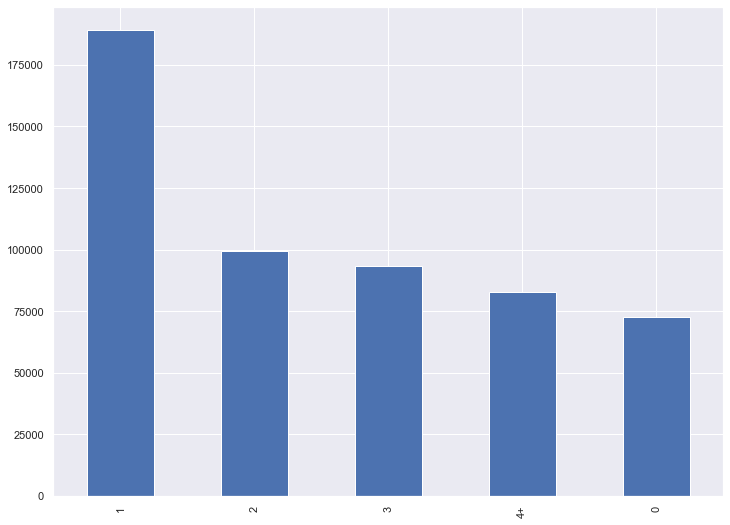

In [34]:
df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar');

In [35]:
 df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)

,Stay_In_Current_City_Years,Purchase
1,1,1763243917
2,2,934676626
3,3,872531130
4,4+,774711276
0,0,672505429


* A partir dos dados analisados é possível inferir que para o ano 0 as pessoas provavelmente estão explorando as cidade e acredito que uma boa correlação mapear o tipo de produto que essas pessoas compram, se são mobílias para casa ou itens de reforma e quais outros tipos de itens podemos descobrir.
* Percebemos também que no ano 1, é o ano onde as pessoas comprar mais. Acredito que no ano 1 as pessoas ainda estão se estabelecendo. A credito que que nesse ano as vendas de produtos para casa se intensificam e também a venda de itens de conforto.
* Já nos anos seguintes, vemos uma diminuição nas compras proporcional à quantidade anos que as pessoas passam na cidade 

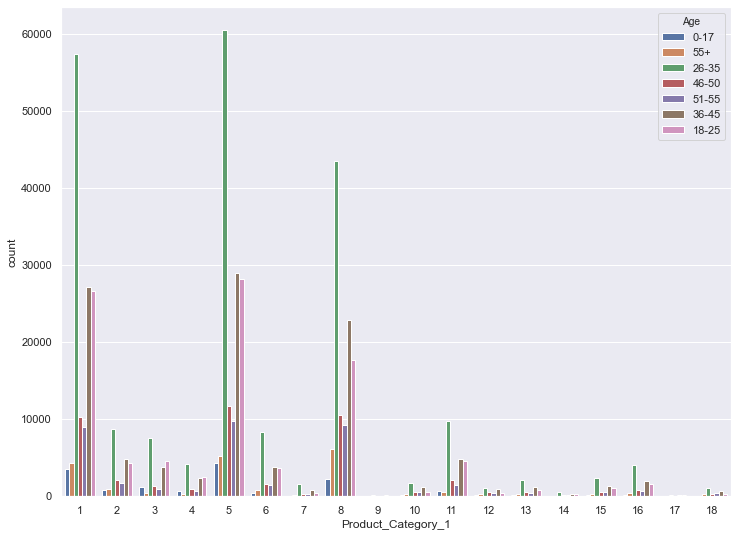

In [36]:
sns.countplot(df['Product_Category_1'],hue=df["Age"]);

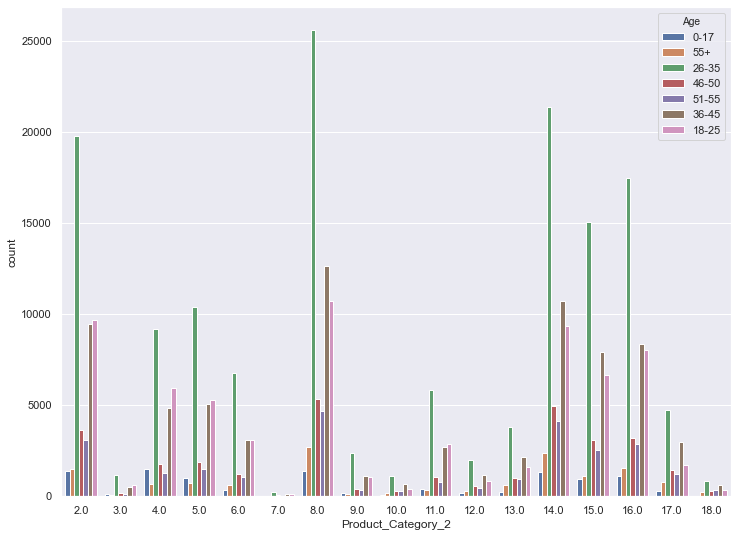

In [37]:
sns.countplot(df['Product_Category_2'],hue=df["Age"]);

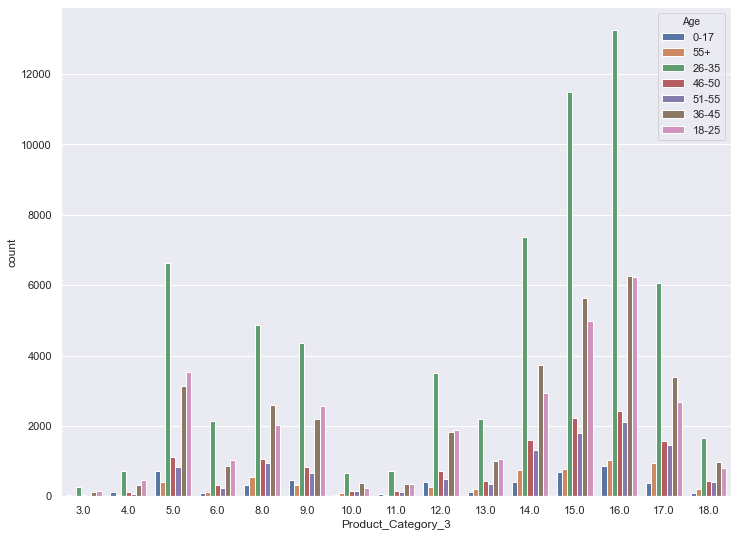

In [38]:
sns.countplot(df['Product_Category_3'],hue=df["Age"]);

### 1.7 - Product_Categories

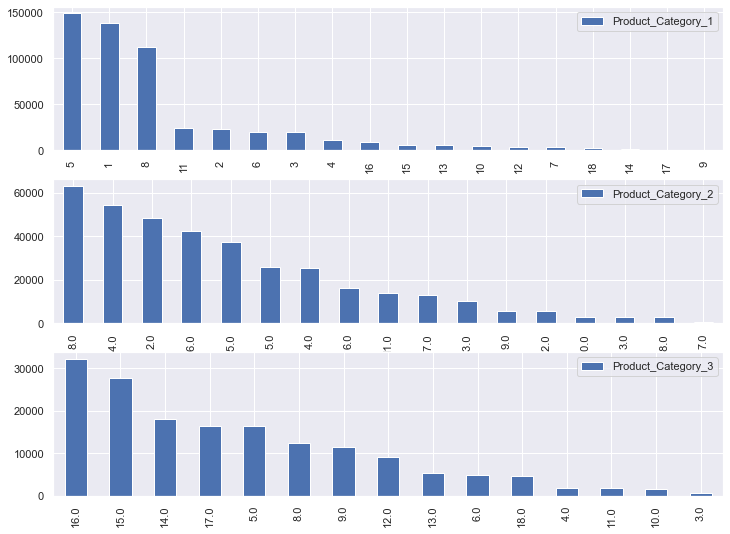

In [39]:
for i,j in enumerate(['Product_Category_1', 'Product_Category_2', 'Product_Category_3']):
    ax=plt.subplot(3,1,i+1)
    df[j].value_counts().plot(kind= 'bar')
    plt.legend();

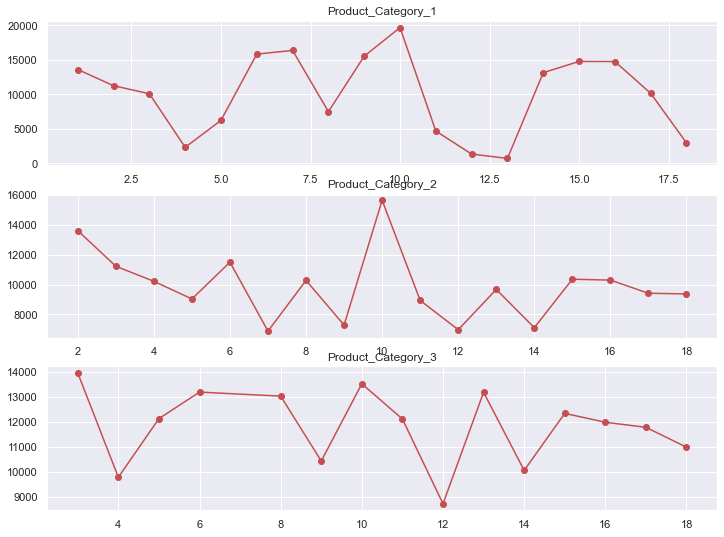

In [40]:
for i,j in enumerate(['Product_Category_1', 'Product_Category_2', 'Product_Category_3']):
    ax=plt.subplot(3,1,i+1)
    pc =  df.groupby(j)['Purchase'].mean()
    plt.plot(pc.index,pc.values,'ro-')
    plt.title(j);

In [65]:
df.User_ID

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
537572    1004737
537573    1004737
537574    1004737
537575    1004737
537576    1004737
Name: User_ID, Length: 537577, dtype: int64

In [68]:
df[df['User_ID'] == 1000001].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
39180,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842


In [72]:
df[(df['Product_Category_1'] == 5)&(df['Product_Category_2'] == 8)&(df['Product_Category_3'] == 16)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4577,1000746,P00151242,F,18-25,19,B,3,0,5,8.0,16.0,1890
10854,1001658,P00151242,F,36-45,6,B,2,0,5,8.0,16.0,8675
13615,1002024,P00151242,M,0-17,19,C,2,0,5,8.0,16.0,1986
17955,1002825,P00151242,F,26-35,20,B,1,1,5,8.0,16.0,7165
18091,1002853,P00151242,M,0-17,1,C,2,0,5,8.0,16.0,3448
...,...,...,...,...,...,...,...,...,...,...,...,...
517300,1001671,P00151242,M,36-45,0,B,2,0,5,8.0,16.0,8811
521361,1002215,P00151242,F,26-35,0,B,2,1,5,8.0,16.0,8694
528107,1003409,P00151242,M,26-35,4,C,4+,1,5,8.0,16.0,8585
529529,1003590,P00151242,F,18-25,15,A,1,0,5,8.0,16.0,8788


In [64]:
df[df['Product_ID'] == 'P00069042'].head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
825,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715
3314,1000541,P00069042,F,18-25,4,C,3,0,3,NaN,NaN,11037
4224,1000698,P00069042,M,18-25,4,A,1,0,3,NaN,NaN,8009


A categoria de produto acaba por ser uma informação redundante para o _dataset_. É importante saber que item tipo de item vendeu mais em cada categoria porém isso não afetará a predição do volume de vendas.

# 2.0 - O Modelo 

### Para este modelo foram realizados os seguintes passos: 

* 2.1 - Engenharia de _features_: Remoção das _features_ de produto, em vista que, foi entendido que elas não agregam à solução do problema.Foram criadas _features_ relacionadas ao número de itens comprados por clientes e ao montante gasto nessas compras.
* 2.2 - Transformação de _features_ categóricas em numéricas.
* 2.3 - Remoção de outliers por Z score.
* 2.4 - Aplicação do modelo de _Machine Learning_ :
    * 2.4.1 - Previsão do volume de itens por pessoa.
    * 2.4.2 - Previsão do montante gasto.
* 2.5 - Simulação de desempenho do modelo para uma nova _Black Friday_.


### 2.1 - Engenharia de _features_

In [44]:
user_count = df.User_ID.value_counts().reset_index().sort_values(by='index').rename(columns={'index':'User_ID', 'User_ID':'count_items'})
#user_count.head()

user_purch = df.groupby('User_ID')['Purchase'].sum().reset_index()
#user_purch

aux = df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']].copy()
aux = aux.drop_duplicates()

In [45]:
result = pd.merge(aux, user_count, on='User_ID')
result = pd.merge(result, user_purch, on='User_ID')
result.columns = ['user_id','gender','age','occupation','city_category','years_stay_city','marital_status','items_volume','purchase_total']
result

,user_id,gender,age,occupation,city_category,years_stay_city,marital_status,items_volume,purchase_total
0,1000001,F,0-17,10,A,2,0,34,333481
1,1000002,M,55+,16,C,4+,0,76,810353
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,13,205987
4,1000005,M,26-35,20,A,1,1,106,821001
...,...,...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0,19,140754
5887,1004871,M,18-25,12,C,2,0,11,108483
5888,1004113,M,36-45,17,C,3,0,20,213550
5889,1005391,M,26-35,7,A,0,0,6,52309


### 2.2 - Lidando com _features_ categóricas

In [46]:
# Gender
result['gender'].replace({"M":1,"F":0},inplace=True)

# Age
result['age']=result['age'].apply(map_age)

#Mapping city and ranking by count
result['city_category']=result['city_category'].map({"B":1,"A":2,"C":3})
result['city_category']= result['city_category'].astype(int)

result['years_stay_city']= result['years_stay_city'].replace("4+",4)
result['years_stay_city']= result['years_stay_city'].astype(int)

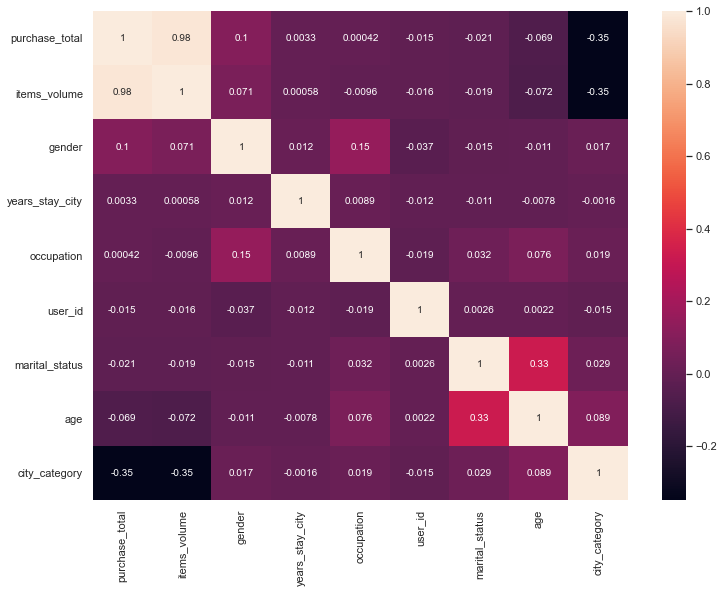

In [47]:
features_corr = result.corr()['purchase_total'].sort_values(ascending=False).index
# creating a correnlation heatmap with the chosen features
correlation = result[features_corr].corr()
sns.heatmap(correlation, annot=True, annot_kws={'size':10});

Existe uma alta correlação entre `purchase_total` e `items_volume`, uma correlação negativa de moderada a baixar com `city_category`, uma baixa correlação com `gender` e nenhuma correlação com as outras features.

### 2.3 - Remoção de _outliers_ por _zscore_

In [48]:
import scipy.stats

#scipy.stats.mstats.winsorize(result['purchase_total'], limits=0.05)
#scipy.stats.mstats.winsorize(result['items_volume'], limits=0.05)

z = np.abs(scipy.stats.zscore(result))
print(z)

result = result[(z<3).all(axis=1)]

[[1.73458772 1.59248686 1.74758177 ... 0.85089772 0.5405354  0.55553672]
 [1.73401407 0.62794867 2.25384501 ... 0.85089772 0.14401275 0.04437531]
 [1.73344042 0.62794867 0.41377284 ... 0.85089772 0.58774048 0.54679641]
 ...
 [0.62425104 0.62794867 0.25313162 ... 0.85089772 0.67270961 0.68409134]
 [1.35737262 0.62794867 0.41377284 ... 0.85089772 0.80488383 0.85692635]
 [0.85805425 0.62794867 1.0806773  ... 1.17522938 0.74823774 0.74958473]]


### 2.4 - Aplicação do modelo de _Machine Learning_

In [49]:
result2 = result.copy()
result=result.set_index('user_id')

from sklearn.model_selection import train_test_split


X1 = result.drop("purchase_total",axis=1)
y1 = result['purchase_total'] # target 

X2 = result.drop(["purchase_total",'items_volume'],axis=1)
y2 = result['items_volume'] # target 


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=1)

#### Modelo Base (Árvore de Decisão)

In [50]:
# Import metrics to evaluate the best algorithm
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

# Importing regression model algorithm 
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Checking the runtime for the algorithm
start = time()
tree.fit(X2_train, y2_train)
end = time()

tree_predicted2 = tree.predict(X2_test)

# printing the running time and the metrics of the model 
print(f'Processing time: {round(end-start, 3)} s ',
      f'MAE: {round(mean_absolute_error(y2_test, tree_predicted2),3)}',
      f'RMSE: {round(np.sqrt(mean_squared_error(y2_test, tree_predicted2)),3)}',
      f'MedAE: {round(median_absolute_error(y2_test, tree_predicted2),3)}')

Processing time: 0.009 s  MAE: 64.408 RMSE: 91.36 MedAE: 43.775


In [51]:
# Checking the runtime for the algorithm
start = time()
tree.fit(X1_train, y1_train)
end = time()

tree_predicted = tree.predict(X1_test)

# printing the running time and the metrics of the model 
print(f'Processing time: {round(end-start, 3)} s ',
      f'MAE: {round(mean_absolute_error(y1_test, tree_predicted),3)}',
      f'RMSE: {round(np.sqrt(mean_squared_error(y1_test, tree_predicted)),3)}',
      f'MedAE: {round(median_absolute_error(y1_test, tree_predicted),3)}')

Processing time: 0.019 s  MAE: 137379.148 RMSE: 215798.233 MedAE: 77108.5


### Testando outros modelos

In [52]:
# Importing regression model algorithm 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

dict_metrics={'MAE': mean_squared_error, 'MSE': median_absolute_error, 'MedAE': mean_absolute_error} 

# creating a dictiorany with the models I wanna test
dict_models={'Ridge': Ridge(alpha=1, solver="cholesky"),
             'Lasso': Lasso(alpha=0.5),
             'Random Forest': RandomForestRegressor(criterion='mae', max_depth=8, max_leaf_nodes=None, 
                                                    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0, n_estimators= 200, n_jobs=-1, 
                                                    random_state=0, verbose=0, warm_start=False)}

### 2.4.1 - Previsão do volume de itens por pessoa.

In [53]:
# implementation to evaluate the models based on their metrics
with open('results_itemsv.txt', 'w') as f: # writing a text file with the results
    for name, model in dict_models.items():
        classifier = model
        start = time()
        classifier.fit(X2_train, y2_train)
        end = time()
        predicted = classifier.predict(X2_test)
        list_results = []
       
        f.write(f'\n{name}\n')
        f.write(f'Running time: {round(end - start, 3)} s\n')
        for score, metric in dict_metrics.items():

            result = metric(y2_test, predicted)
            f.write(f'{score} {round(result,4)}\n')

In [54]:
with open('results_itemsv.txt', 'r') as f:
    print(f.read()) # reading the text file saved


Ridge
Running time: 0.003 s
MAE 5388.5134
MSE 41.1256
MedAE 54.9857

Lasso
Running time: 0.003 s
MAE 5379.622
MSE 41.0171
MedAE 54.995

Random Forest
Running time: 14.385 s
MAE 5793.3227
MSE 33.0475
MedAE 52.5908



In [55]:
random_forest = RandomForestRegressor(criterion='mae', max_depth=8, max_leaf_nodes=None, 
                                                    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0, n_estimators= 200, n_jobs=-1, 
                                                    random_state=0, verbose=0, warm_start=False)
random_forest.fit(X1_train, y1_train)
rf_predicted = random_forest.predict(X1_test)

### 2.4.2 - Previsão do montante gasto.

In [56]:

# implementation to evaluate the models based on their metrics
with open('results_purchase.txt', 'w') as f: # writing a text file with the results
    for name, model in dict_models.items():
        classifier = model
        start = time()
        classifier.fit(X1_train, y1_train)
        end = time()
        predicted = classifier.predict(X1_test)
        list_results = []
       
        f.write(f'\n{name}\n')
        f.write(f'Running time: {round(end - start, 3)} s\n')
        for score, metric in dict_metrics.items():

            result = metric(y1_test, predicted)
            f.write(f'{score} {round(result,4)}\n')

In [57]:
random_forest.fit(X2_train, y2_train)
rf_predicted2 = random_forest.predict(X2_test)

### 2.5 - Simulação de desempenho do modelo para uma nova _Black Friday_

In [58]:
Xt_aux = X1_test.drop('items_volume', axis=1)

Xt_aux['items_volume'] = rf_predicted2.astype(int)

In [59]:
# Checking the runtime for the algorithm
rft_start = time()
random_forest.fit(X1_train, y1_train)
rft_end = time()

# Predicting in the df_train dataset
rft_predicted = random_forest.predict(Xt_aux)

# printing the running time and the metrics of the model 
print(f'Processing time: {round(rft_end-rft_start, 3)} s ',
      f'MAE: {round(mean_absolute_error(y2_test, rft_predicted),3)}',
      f'RMSE: {round(np.sqrt(mean_squared_error(y2_test, rft_predicted)),3)}',
      f'MedAE: {round(median_absolute_error(y2_test, rft_predicted),3)}')

Processing time: 21.084 s  MAE: 619241.596 RMSE: 686711.788 MedAE: 495509.578


In [60]:
Xt_aux['purchase_total'] = np.round(rft_predicted, 2)

In [61]:
volume = Xt_aux.items_volume.sum()
retail  = Xt_aux.purchase_total.sum()
print(f'O volume de vendas predito para esse grupo de clientes foi de {volume} produtos já a receita a ser gerada é de {retail:,} R$')

O volume de vendas predito para esse grupo de clientes foi de 108763 produtos já a receita a ser gerada é de 1,063,993,640.33 R$


# Conclusões

* Foi possível através da análise exploratória de dados encontrar diversos _insights_ importantes para o negócio, tais como faixa etária que mais compra produtos, produtos mais vendidos, gasto médio por idade, cidade e tempo de permanência no local.
* Foi entendido que a tanto a _feature_ `Product_ID` quanto as __Categorias de Produto__ não faziam sentido para uma previsão de vendas e receita.
* Acredito que a construção do modelo de regressão é promissor e a variação nas métricas está relacionada a variação dos valores no próprio modelo.
* Já em relação à simulação para próxima _Black Friday_ acredito que o aumento nas métricas do modelo simulado se vem do aumento no viés pois o modelo é rodado duas vezes o que implicaria numa propagação de erro.

# Próximos passos

* Melhora do modelo de regressão para a simulação de novos clientes. Talvez a aplicação de uma regressão multipla. 
* Criação de um recomendador utilizando as informações de produto para a geração de um algoritmo.